In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data=pd.read_csv('C:\\Users\\rawat\\Downloads\\archive\\OnlineRetail.csv')

In [69]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  541909 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   541909 non-null  object 
 8   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 37.2+ MB


index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [99]:
data['CustomerID']=data['CustomerID'].astype(str)

In [100]:
data.fillna({'CustomerID':'python', 'Description':'unknown'},inplace=True)


In [ ]:
def func(quantity):
    if quantity<0:
        quantity=-quantity
    else:
        quantity=quantity
    return quantity
data['Quantity']=data['Quantity'].apply(func)
data['UnitPrice']=data['UnitPrice'].apply(func)

In [108]:
a=data['StockCode'].value_counts().reset_index()
a['count']
merged_data=pd.merge(data, a, how='inner', on ='StockCode')
merged_data

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2313
1,49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:02,2.55,17850.0,United Kingdom,2313
2,66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:32,2.55,17850.0,United Kingdom,2313
3,220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,12/1/2010 10:19,2.55,17511.0,United Kingdom,2313
4,262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/1/2010 10:39,2.55,13408.0,United Kingdom,2313
...,...,...,...,...,...,...,...,...,...,...
541904,512588,579512,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2,11/29/2011 16:47,2.91,nan,United Kingdom,1
541905,527065,580691,90214U,"LETTER ""U"" BLING KEY RING",12,12/5/2011 15:48,0.29,13790.0,United Kingdom,1
541906,537224,581238,47591b,SCOTTIES CHILDRENS APRON,1,12/8/2011 10:53,4.13,nan,United Kingdom,1
541907,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,2


In [140]:
merged_data.loc[(merged_data['UnitPrice']==0) & (merged_data['Description']=='unknown') & (merged_data['count']>1)]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count
2844,178012,552218,84406B,unknown,38,5/6/2011 15:15,0.0,nan,United Kingdom,296
3151,116919,546307,84029G,unknown,280,3/10/2011 16:22,0.0,nan,United Kingdom,474
3571,52379,540778,84029E,unknown,50,1/11/2011 11:15,0.0,nan,United Kingdom,452
3584,94306,544348,84029E,unknown,13,2/18/2011 9:52,0.0,nan,United Kingdom,452
3612,269195,560440,84029E,unknown,1,7/18/2011 16:36,0.0,nan,United Kingdom,452
...,...,...,...,...,...,...,...,...,...,...
532362,354121,567863,35598A,unknown,8,9/22/2011 14:03,0.0,nan,United Kingdom,3
534557,499156,578628,23541,unknown,20,11/24/2011 15:55,0.0,nan,United Kingdom,154
537388,435062,574073,23579,unknown,3,11/2/2011 15:15,0.0,nan,United Kingdom,40
537390,495917,578336,23579,unknown,1,11/24/2011 9:06,0.0,nan,United Kingdom,40


In [ ]:
b=merged_data.index[(merged_data['UnitPrice']==0) & (merged_data['Description']=='unknown') & (merged_data['count']==1)].tolist()
merged_data.drop(b, axis=0, inplace=True)

In [178]:
merged_data['Total_sale']=(merged_data['UnitPrice']+merged_data['Quantity']).round(0)

In [179]:
merged_data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count,Total_sale,G_nation,month,year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2313,9.0,United Kingdom,12,2010
1,49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,2313,9.0,United Kingdom,12,2010
2,66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,2313,9.0,United Kingdom,12,2010
3,220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,2313,67.0,United Kingdom,12,2010
4,262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,2313,35.0,United Kingdom,12,2010


In [169]:
def coun(country):
    if country=='United Kingdom':
        return 'United Kingdom'
    else:
        return 'other countries'
merged_data['G_nation']=merged_data['Country'].apply(coun)

Text(0.5, 1.0, 'Country Comparative')

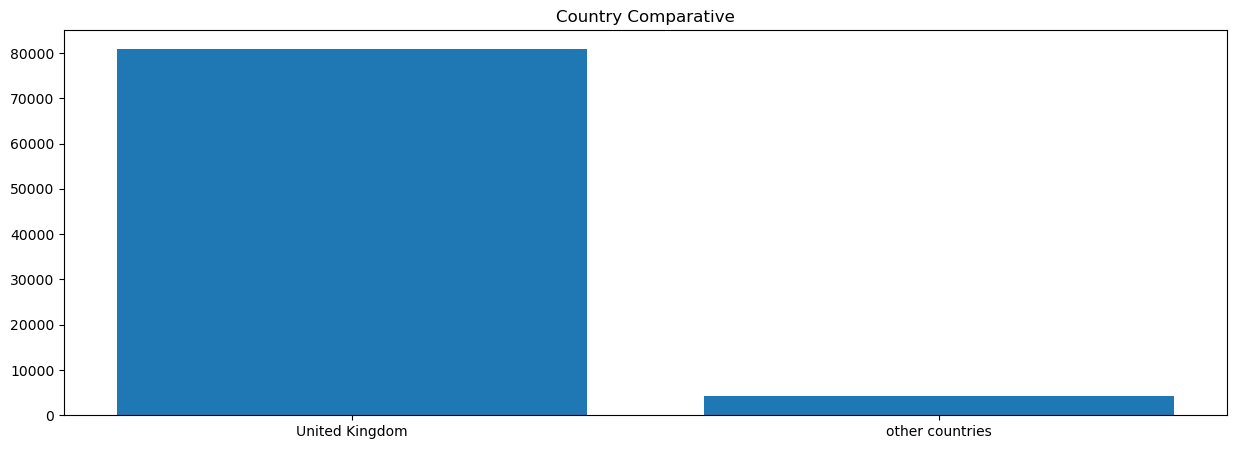

In [171]:
fig=plt.figure(figsize=(15,5))
plt.bar(merged_data['G_nation'],merged_data['Total_sale'])
plt.title('Country Comparative')

In [172]:
merged_data.InvoiceDate=pd.to_datetime(merged_data.InvoiceDate)
merged_data['month']=merged_data['InvoiceDate'].dt.month
merged_data['year']=merged_data['InvoiceDate'].dt.year

Text(0.5, 1.0, 'Total_sale vs month')

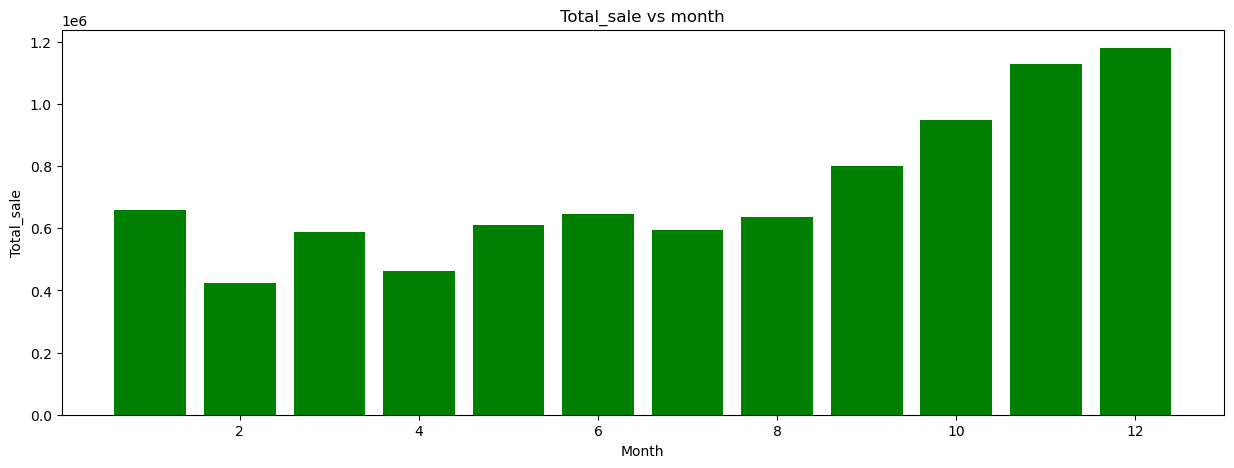

In [191]:
month_ts=merged_data.groupby('month')['Total_sale'].sum().reset_index()
fig=plt.figure(figsize=(15,5))
plt.bar(month_ts['month'],month_ts['Total_sale'], color='g')
plt.xlabel('Month')
plt.ylabel('Total_sale')
plt.title('Total_sale vs month')

Text(0.5, 1.0, 'Total_sale vs year')

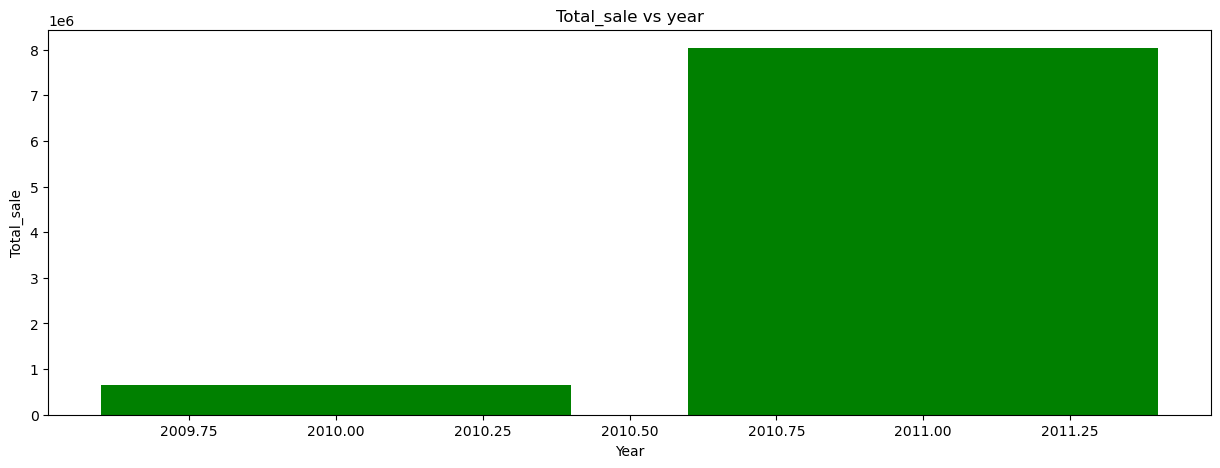

In [190]:
year_ts=merged_data.groupby('year')['Total_sale'].sum().reset_index()
fig=plt.figure(figsize=(15,5))
plt.bar(year_ts['year'],year_ts['Total_sale'], color='g')
plt.xlabel('Year')
plt.ylabel('Total_sale')
plt.title('Total_sale vs year')

Text(0.5, 1.0, 'Total_sale vs products')

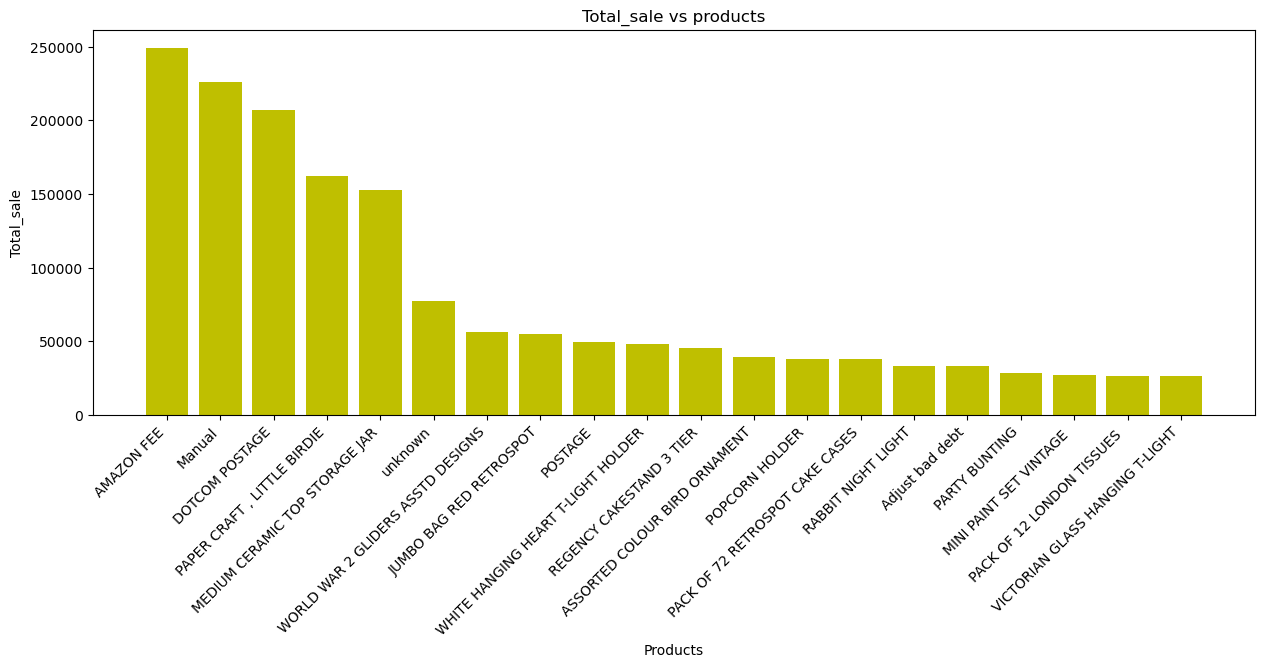

In [193]:
des=merged_data.groupby('Description')['Total_sale'].sum().reset_index().sort_values('Total_sale', ascending=False)
fig=plt.figure(figsize=(15,5))
plt.bar(des['Description'][:20],des['Total_sale'][:20], color='y')
plt.xlabel('Products')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total_sale')
plt.title('Total_sale vs products')

Text(0.5, 1.0, 'Year-2010 Total_sale vs Country(UK excluded)')

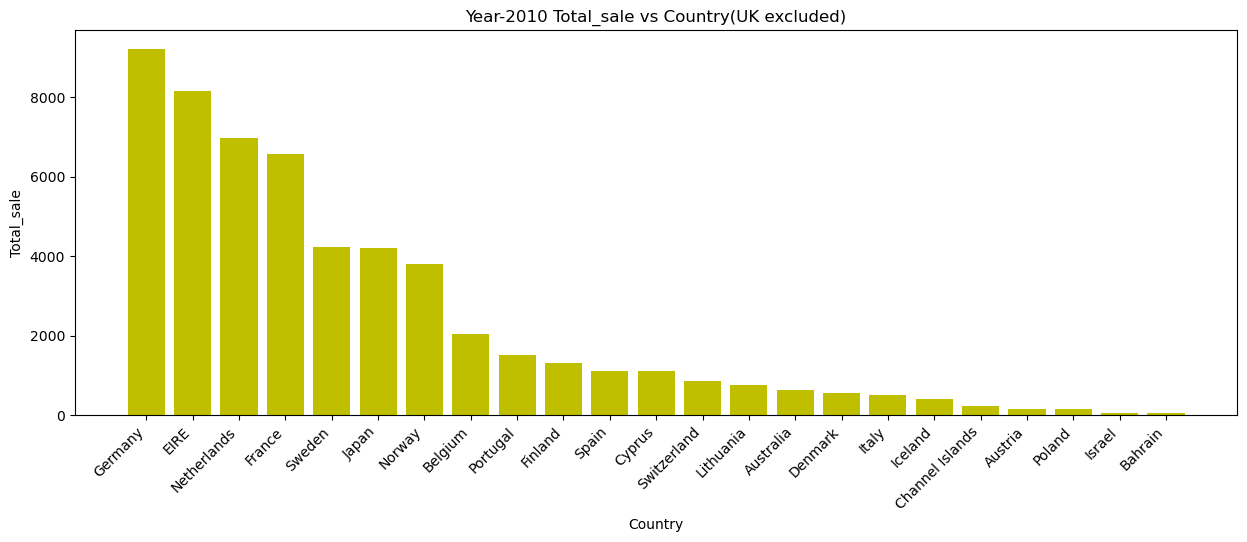

In [207]:
cou=merged_data[merged_data['year']==2010].groupby(['Country'])['Total_sale'].sum().reset_index().sort_values('Total_sale', ascending=False)
fig=plt.figure(figsize=(15,5))
plt.bar(cou['Country'][1:30],cou['Total_sale'][1:30], color='y')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total_sale')
plt.title('Year-2010 Total_sale vs Country(UK excluded)')